# Базовые алгоритмы машинного обучения. Кластерный анализ

# Метод: k-means

## Задание

1. Разработать программу, реализующую кластеризацию методом k-средних (k-means) -> реализована модификация алгоритма k-means++.
2. Визуализировать используемый набор данных и работу алгоритма.
3. Построить график зависимости суммарного внутригруппового разброса (within-cluster variation) от количества кластеров, определить подходящее количество кластеров методом локтя.

## Задача кластеризации - один из типов задач, решаемых машинным обучением без учителя (Unsupervised learning)

**Кластеризация** — это классификация, но без заранее известных классов. Она сама ищет похожие объекты и объединяет их в кластеры.

## Подключение необходимых библиотек

`%matplotlib inline` -> визуализирует графики с matplotlib прямо в jupyter notebook, а не в отдельном окне

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

## Сгенерируем датасет и визуализируем его

Насыпем на плоскость 5 кластеров точек.

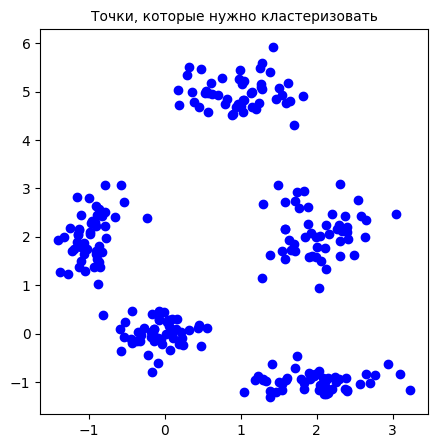

In [2]:
fig, ax = plt.subplots(figsize = (5,5))

X = np.zeros((250, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

X[150:200, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[150:200, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

X[200:250, 0] = np.random.normal(loc=1.0, scale=.4, size=50)
X[200:250, 1] = np.random.normal(loc=5.0, scale=.3, size=50)

ax.set_title("Точки, которые нужно кластеризовать", fontsize=10)

ax.scatter(X[:, 0], X[:, 1], color='blue')
plt.show()

## Определение оптимального количества кластеров с помощью метода <u>"локтя"</u>

При использовании метода k-средних количество кластеров, как правило, не задано и необходимо выбрать подходящее значение. Для этого используют простой и эффективный метод "локтя".

In [3]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

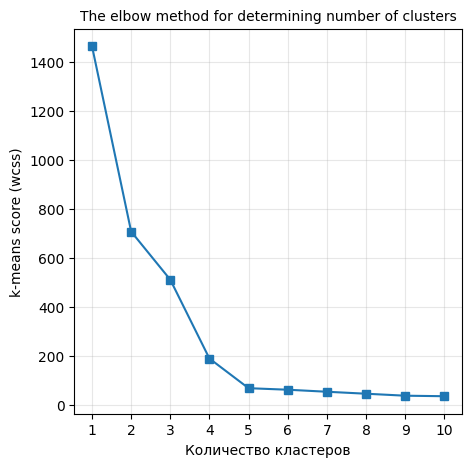

In [4]:
#График метода "локтя" для определения количества кластеров

fig, ax = plt.subplots(figsize = (5,5))
ax.set_title("The elbow method for determining number of clusters", fontsize=10)

ax.set_xlabel("Количество кластеров") # Подписываем ось X
ax.set_ylabel("k-means score (wcss)") # Подписываем ось Y

ax.set_xticks(range(1, 11))

ax.grid(alpha = 0.3)

ax.plot(range(1, 11), wcss, marker='s')

plt.show()

**Оптимальное количество кластеров = 5.** (Именно столько кластеров мы задавали -> идем в правильном направлении)

## Реализуем алгоритм k-means для оптимального количества кластеров

In [5]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42, n_init=1)
y_kmeans = kmeans.fit_predict(X)

## Визуализируем результат работы алгоритма

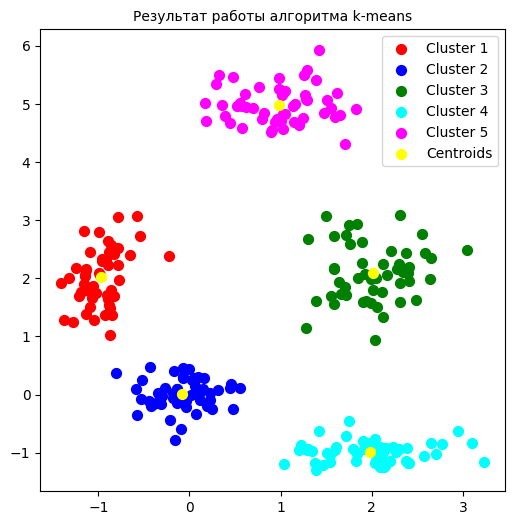

In [6]:
fig, ax = plt.subplots(figsize = (6,6))

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=50, c="red", label="Cluster 1")
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=50, c="blue", label="Cluster 2")
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=50, c="green", label="Cluster 3")
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=50, c="cyan", label="Cluster 4")
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=50, c="magenta", label="Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c="yellow", label="Centroids")

ax.set_title("Результат работы алгоритма k-means", fontsize=10)

ax.legend(loc='best') # Расположение легенды (выбирается лучшее расположение автоматически)

plt.show()